# Building Music Recommendation System using Spotify Dataset

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

# Read Data

In [5]:
data=pd.read_csv("dataset (1).csv")
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.6760,0.4610,...,-6.746,0.0,0.1430,0.032200,0.000001,0.3580,0.7150,87.917,4.0,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.4200,0.1660,...,-17.235,1.0,0.0763,0.924000,0.000006,0.1010,0.2670,77.489,4.0,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.4380,0.3590,...,-9.734,1.0,0.0557,0.210000,0.000000,0.1170,0.1200,76.332,4.0,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.2660,0.0596,...,-18.515,1.0,0.0363,0.905000,0.000071,0.1320,0.1430,181.740,3.0,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.6180,0.4430,...,-9.681,1.0,0.0526,0.469000,0.000000,0.0829,0.1670,119.949,4.0,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,6092,4ZvWUYxTlbpVGfuIYHqmlL,Bölzer,Aura,Entranced By the Wolfshook,23.0,403000.0,True,0.1470,0.9010,...,-11.921,1.0,0.1190,0.000018,0.329000,0.0617,0.0978,144.397,4.0,black-metal
6093,6093,4ZSMuhXGEOniQlBI6Nns5D,Eisregen,Krebskollektion,Blutgeil,24.0,258680.0,False,0.3860,0.8820,...,-5.546,1.0,0.0434,0.000116,0.003170,0.3260,0.7570,142.817,4.0,black-metal
6094,6094,7472P30KNDvqlHFJ8kjohy,Satyricon,Live at the Opera,Mother North,22.0,502586.0,False,0.0855,0.9950,...,-9.285,1.0,0.3720,0.000706,0.015200,0.9880,0.0263,81.510,4.0,black-metal
6095,6095,24sxcPbgnYmyMQm9N6o1Bs,Hypocrisy,A Taste of Extreme Divinity,Valley of the Damned,25.0,257013.0,False,0.4000,0.9840,...,-3.939,1.0,0.1230,0.000002,0.901000,0.3240,0.0724,109.974,4.0,black-metal


In [6]:
data.shape

(6097, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6097 entries, 0 to 6096
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        6097 non-null   int64  
 1   track_id          6097 non-null   object 
 2   artists           6097 non-null   object 
 3   album_name        6097 non-null   object 
 4   track_name        6097 non-null   object 
 5   popularity        6096 non-null   float64
 6   duration_ms       6096 non-null   float64
 7   explicit          6096 non-null   object 
 8   danceability      6096 non-null   float64
 9   energy            6096 non-null   float64
 10  key               6096 non-null   float64
 11  loudness          6096 non-null   float64
 12  mode              6096 non-null   float64
 13  speechiness       6096 non-null   float64
 14  acousticness      6096 non-null   float64
 15  instrumentalness  6096 non-null   float64
 16  liveness          6096 non-null   float64


In [8]:
data.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [9]:
data1 = data.drop(['Unnamed: 0', 'track_id'], axis=1)
data1

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.6760,0.4610,1.0,-6.746,0.0,0.1430,0.032200,0.000001,0.3580,0.7150,87.917,4.0,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.4200,0.1660,1.0,-17.235,1.0,0.0763,0.924000,0.000006,0.1010,0.2670,77.489,4.0,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.4380,0.3590,0.0,-9.734,1.0,0.0557,0.210000,0.000000,0.1170,0.1200,76.332,4.0,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.2660,0.0596,0.0,-18.515,1.0,0.0363,0.905000,0.000071,0.1320,0.1430,181.740,3.0,acoustic
4,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.6180,0.4430,2.0,-9.681,1.0,0.0526,0.469000,0.000000,0.0829,0.1670,119.949,4.0,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,Bölzer,Aura,Entranced By the Wolfshook,23.0,403000.0,True,0.1470,0.9010,4.0,-11.921,1.0,0.1190,0.000018,0.329000,0.0617,0.0978,144.397,4.0,black-metal
6093,Eisregen,Krebskollektion,Blutgeil,24.0,258680.0,False,0.3860,0.8820,0.0,-5.546,1.0,0.0434,0.000116,0.003170,0.3260,0.7570,142.817,4.0,black-metal
6094,Satyricon,Live at the Opera,Mother North,22.0,502586.0,False,0.0855,0.9950,2.0,-9.285,1.0,0.3720,0.000706,0.015200,0.9880,0.0263,81.510,4.0,black-metal
6095,Hypocrisy,A Taste of Extreme Divinity,Valley of the Damned,25.0,257013.0,False,0.4000,0.9840,3.0,-3.939,1.0,0.1230,0.000002,0.901000,0.3240,0.0724,109.974,4.0,black-metal


In [10]:
data1[data1.duplicated()].shape

(16, 19)

In [11]:
data2 = data1.drop_duplicates()
data2

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.6760,0.4610,1.0,-6.746,0.0,0.1430,0.032200,0.000001,0.3580,0.7150,87.917,4.0,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.4200,0.1660,1.0,-17.235,1.0,0.0763,0.924000,0.000006,0.1010,0.2670,77.489,4.0,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.4380,0.3590,0.0,-9.734,1.0,0.0557,0.210000,0.000000,0.1170,0.1200,76.332,4.0,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.2660,0.0596,0.0,-18.515,1.0,0.0363,0.905000,0.000071,0.1320,0.1430,181.740,3.0,acoustic
4,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.6180,0.4430,2.0,-9.681,1.0,0.0526,0.469000,0.000000,0.0829,0.1670,119.949,4.0,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,Bölzer,Aura,Entranced By the Wolfshook,23.0,403000.0,True,0.1470,0.9010,4.0,-11.921,1.0,0.1190,0.000018,0.329000,0.0617,0.0978,144.397,4.0,black-metal
6093,Eisregen,Krebskollektion,Blutgeil,24.0,258680.0,False,0.3860,0.8820,0.0,-5.546,1.0,0.0434,0.000116,0.003170,0.3260,0.7570,142.817,4.0,black-metal
6094,Satyricon,Live at the Opera,Mother North,22.0,502586.0,False,0.0855,0.9950,2.0,-9.285,1.0,0.3720,0.000706,0.015200,0.9880,0.0263,81.510,4.0,black-metal
6095,Hypocrisy,A Taste of Extreme Divinity,Valley of the Damned,25.0,257013.0,False,0.4000,0.9840,3.0,-3.939,1.0,0.1230,0.000002,0.901000,0.3240,0.0724,109.974,4.0,black-metal


In [12]:
data2.shape

(6081, 19)

In [13]:
data2[data2.duplicated()].shape

(0, 19)

In [14]:
print(data2['track_genre'].unique())

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' nan]


In [15]:
data2['track_genre'].unique().shape

(8,)

In [16]:
data2['track_genre'].value_counts().head(20)

acoustic       1000
afrobeat        999
ambient         999
anime           999
alternative     994
alt-rock        993
black-metal      96
Name: track_genre, dtype: int64

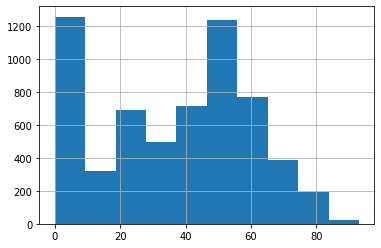

In [17]:
data2['popularity'].hist()

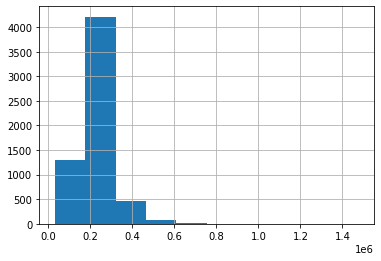

In [18]:
data2['duration_ms'].hist()

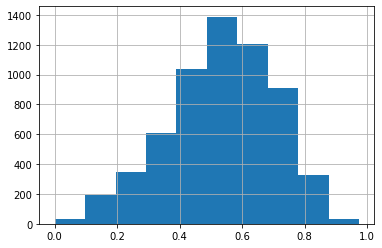

In [19]:
data2['danceability'].hist()

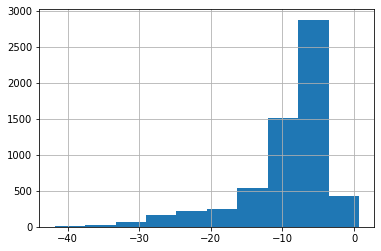

In [20]:
data2['loudness'].hist()

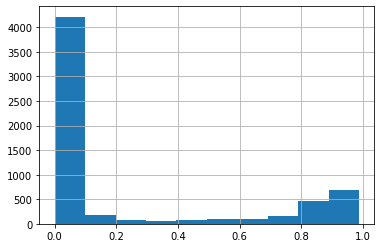

In [21]:
data2['instrumentalness'].hist()

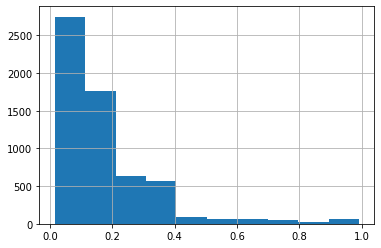

In [22]:
data2['liveness'].hist()

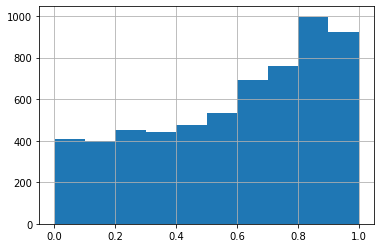

In [23]:
data2['energy'].hist()

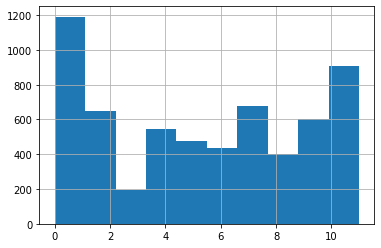

In [24]:
data2['key'].hist()

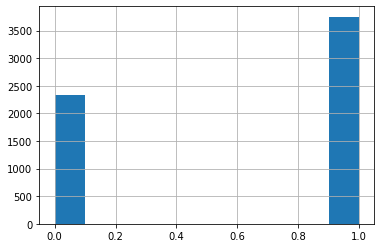

In [25]:
data2['mode'].hist()

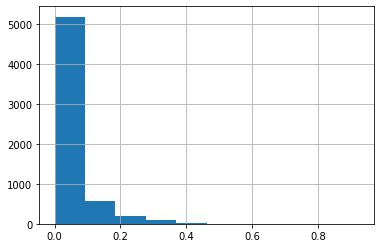

In [26]:
data2['speechiness'].hist()

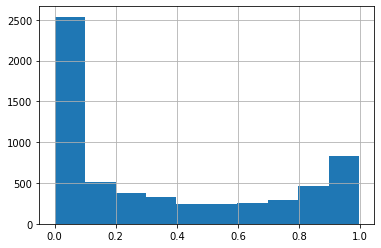

In [27]:
data2['acousticness'].hist()

In [28]:
data2.isna().sum()

artists             0
album_name          0
track_name          0
popularity          1
duration_ms         1
explicit            1
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
time_signature      1
track_genre         1
dtype: int64

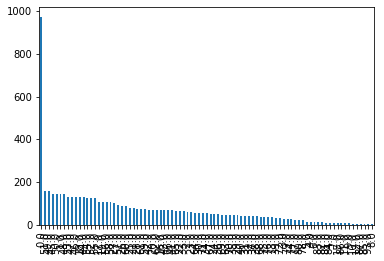

In [29]:
data2['popularity'].value_counts().plot.bar()

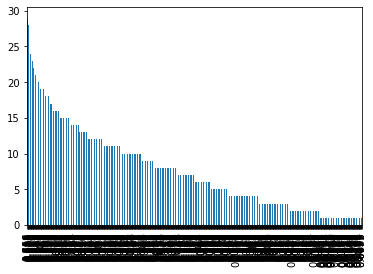

In [30]:
data2['danceability'].value_counts().plot.bar()

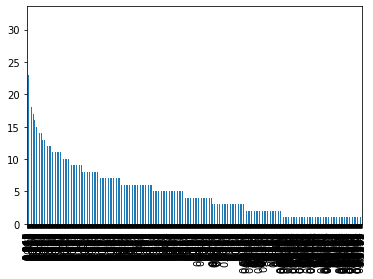

In [31]:
data2['energy'].value_counts().plot.bar()

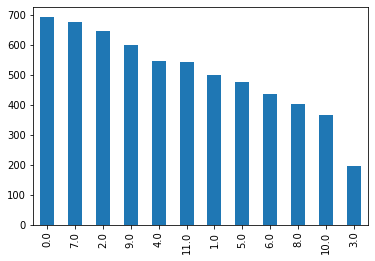

In [32]:
data2['key'].value_counts().plot.bar()

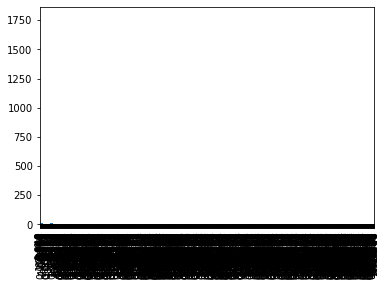

In [33]:
data2['instrumentalness'].value_counts().plot.bar()

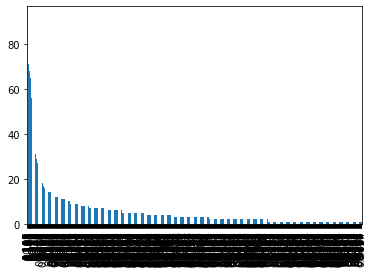

In [34]:
data2['liveness'].value_counts().plot.bar()

In [35]:
data2.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,6080.000000,6.080000e+03,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,36.371875,2.297108e+05,0.533228,0.591529,5.353125,-9.297747,0.616776,0.064379,0.353876,0.223804,0.179870,0.452576,119.994625,3.882072
std,23.732034,8.304820e+04,0.169246,0.284944,3.552183,6.335174,0.486212,0.061830,0.363742,0.361879,0.152224,0.265573,30.550548,0.453541
min,0.000000,3.182400e+04,0.000000,0.001440,0.000000,-41.808000,0.000000,0.000000,0.000001,0.000000,0.014400,0.000000,0.000000,0.000000
25%,18.000000,1.827295e+05,0.424750,0.358000,2.000000,-10.831250,0.000000,0.033775,0.019500,0.000000,0.094600,0.223000,96.469250,4.000000
50%,43.000000,2.217330e+05,0.542000,0.654000,5.000000,-7.304500,1.000000,0.042950,0.197000,0.000267,0.117000,0.430500,119.598000,4.000000
75%,54.000000,2.616100e+05,0.659000,0.844000,8.000000,-5.272500,1.000000,0.065400,0.724250,0.432250,0.218000,0.668000,140.055750,4.000000
max,93.000000,1.478618e+06,0.974000,1.000000,11.000000,0.698000,1.000000,0.924000,0.996000,0.988000,0.992000,0.995000,220.081000,5.000000


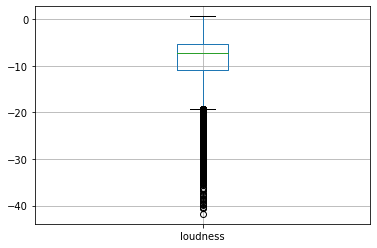

In [36]:
data2.boxplot(column="loudness")

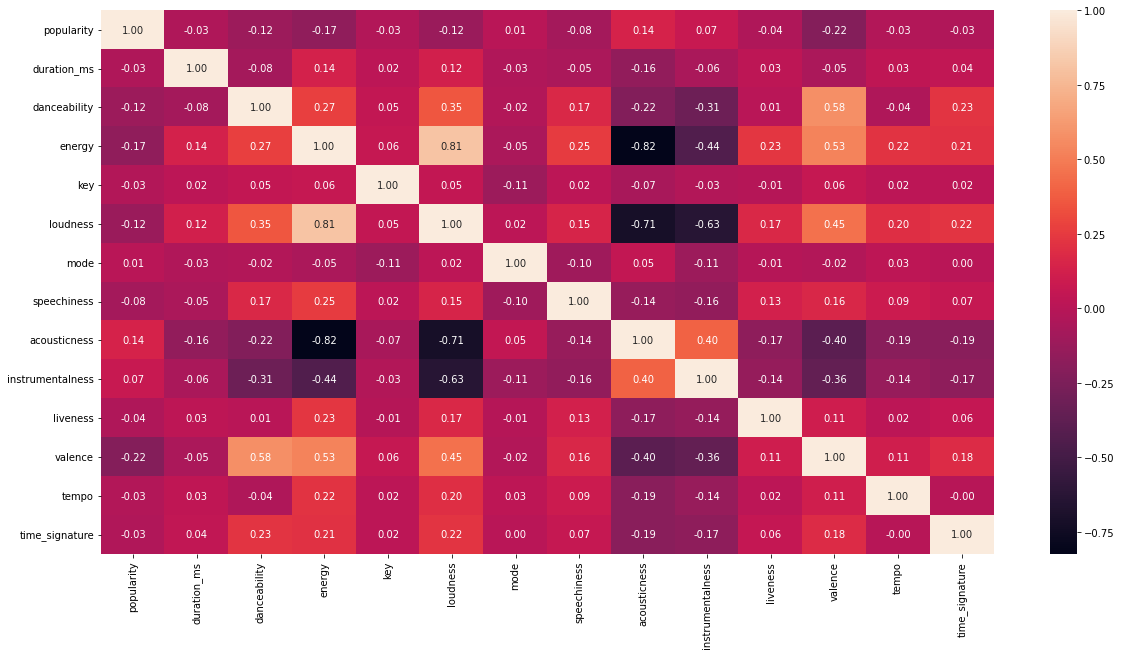

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(data2.corr(),annot=True,fmt=".2f")

# outlier detection

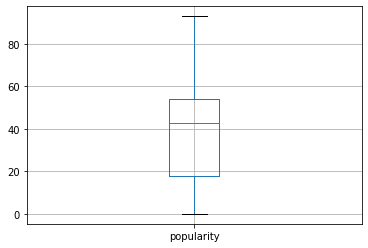

In [38]:
data2.boxplot(column="popularity")

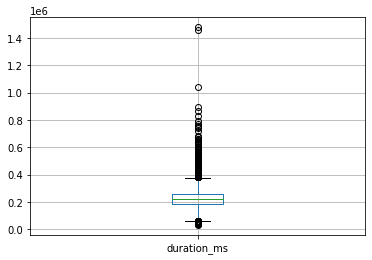

In [39]:
data2.boxplot(column="duration_ms")

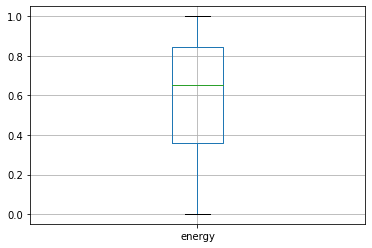

In [40]:
data2.boxplot(column="energy")

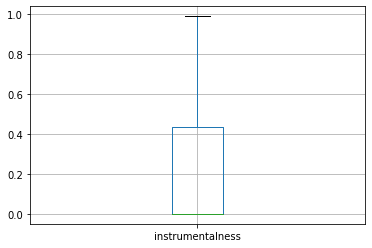

In [41]:
data2.boxplot(column="instrumentalness")

In [42]:
cols = data2.columns
cols

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [43]:
data2[cols].isnull()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6093,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6094,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6095,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


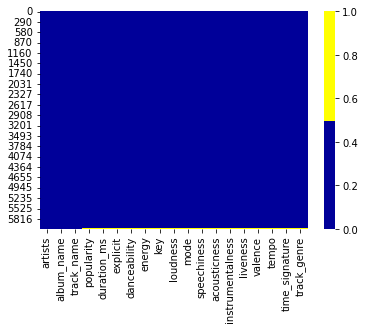

In [44]:
import seaborn as sns

colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.

sns.heatmap(data2[cols].isnull(),
            cmap = sns.color_palette(colours))

In [45]:
data2.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
6092    False
6093    False
6094    False
6095    False
6096     True
Length: 6081, dtype: bool

In [46]:
data2[data2.isnull().any(axis=1)]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
6096,Samael,Passage,The Ones Who Cam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data2[data2.isnull().any(axis=1)].shape[0]

1

In [48]:
data2.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          1
duration_ms         1
explicit            1
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
time_signature      1
track_genre         1
dtype: int64

In [49]:
#Mean Value Imputation
data2['popularity'].mean()

36.371875

In [50]:
#!pip install yellowbrick

In [51]:
from distutils.sysconfig import get_python_lib
print(get_python_lib())
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence','popularity','key','mode']

X, y = data2[feature_names], data2['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()



/usr/lib/python3/dist-packages


ValueError: ignored

In [ ]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','key','mode']

X, y = data2[feature_names], data2['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

# Data Understanding by Visualization and EDA

# Music Over Time/ Duration

In [ ]:
def get_decade(year):
    period_start = int(5) * 2
    decade = '{}s'.format(period_start)
    return decade

data2['decade'] = data['popularity'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data2['decade'])

In [ ]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['duration_ms'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade'])

In [ ]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(data2, y='duration_ms', x=sound_features)
fig.show()

# AUTO EDA

In [ ]:
# !pip install pandas-profiling==2.7.1

In [ ]:
import pandas_profiling as pp
EDA_report= pp.ProfileReport(data2)
EDA_report.to_file(output_file='repo.html')

In [ ]:
#!pip install sweetviz

In [ ]:
import sweetviz as sv
sweet_report = sv.analyze(data2)
sweet_report.show_html('artist_report.html')

# Characteristics of Different Genres

In [ ]:
top10_genres = data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='time_signature', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()


# 

# Clustering Songs with K-Means

In [ ]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=False,))
                                 ], verbose=False)

X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels

In [ ]:
# Visualizing the Clusters with PCA

from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = data['popularity']
projection['cluster'] = data['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

**Model Building**

In [53]:
data2['tags'] = data2['artists'] + data2['track_name'] + data2['track_genre']

In [54]:
data2.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,tags
0,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic,Gen HoshinoComedyacoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic,Ben WoodwardGhost - Acousticacoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic,Ingrid Michaelson;ZAYNTo Begin Againacoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic,Kina GrannisCan't Help Falling In Loveacoustic
4,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic,Chord OverstreetHold Onacoustic


In [55]:
new_data = data2[['album_name','tags','popularity']]

In [56]:
new_data

,album_name,tags,popularity
0,Comedy,Gen HoshinoComedyacoustic,73.0
1,Ghost (Acoustic),Ben WoodwardGhost - Acousticacoustic,55.0
2,To Begin Again,Ingrid Michaelson;ZAYNTo Begin Againacoustic,57.0
3,Crazy Rich Asians (Original Motion Picture Sou...,Kina GrannisCan't Help Falling In Loveacoustic,71.0
4,Hold On,Chord OverstreetHold Onacoustic,82.0
...,...,...,...
6092,Aura,BölzerEntranced By the Wolfshookblack-metal,23.0
6093,Krebskollektion,EisregenBlutgeilblack-metal,24.0
6094,Live at the Opera,SatyriconMother Northblack-metal,22.0
6095,A Taste of Extreme Divinity,HypocrisyValley of the Damnedblack-metal,25.0


In [57]:
song_library = new_data.sort_values(by=['popularity'], ascending=False).head(5000)

In [58]:
song_library.reset_index(inplace=True, drop=True)
song_library

,album_name,tags,popularity
0,I Love You.,The NeighbourhoodSweater Weatheralt-rock,93.0
1,I Love You.,The NeighbourhoodSweater Weatheralternative,93.0
2,Wiped Out!,The NeighbourhoodDaddy Issuesalternative,87.0
3,Wiped Out!,The NeighbourhoodDaddy Issuesalt-rock,87.0
4,Miss You,Oliver Tree;Robin SchulzMiss Youalternative,87.0
...,...,...,...
4995,Los Clásicos del Pop 90s,WeezerSay It Ain't Soalt-rock,1.0
4996,Timeless Rock Hits,JetAre You Gonna Be My Girlalternative,1.0
4997,Planet 80's,Joy DivisionAtmospherealternative,1.0
4998,Anthems for Witches 2022,Marilyn MansonI Put A Spell On Youalt-rock,1.0


In [59]:
song_library['tags'][0]

'The NeighbourhoodSweater Weatheralt-rock'

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=50,stop_words='english')

In [61]:
vectors = cv.fit_transform(song_library['tags']).toarray()

In [62]:
vectors[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0])

In [63]:
from sklearn.metrics.pairwise import cosine_similarity

In [64]:
similarity = cosine_similarity(vectors)
similarity

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
similarity[0].shape

(5000,)

In [66]:
song_library[song_library['album_name'] == 'Miss You'].index[0]

4

In [67]:
sorted(similarity[0],reverse=True)

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [68]:
list(enumerate(similarity[0]))

[(0, 1.0),
 (1, 0.0),
 (2, 0.0),
 (3, 1.0),
 (4, 0.0),
 (5, 0.0),
 (6, 1.0),
 (7, 0.0),
 (8, 1.0),
 (9, 0.0),
 (10, 1.0),
 (11, 0.0),
 (12, 0.0),
 (13, 1.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 1.0),
 (18, 0.0),
 (19, 1.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 1.0),
 (28, 1.0),
 (29, 1.0),
 (30, 0.7071067811865475),
 (31, 0.0),
 (32, 0.5),
 (33, 0.5),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.5),
 (42, 1.0),
 (43, 0.0),
 (44, 0.0),
 (45, 1.0),
 (46, 0.0),
 (47, 0.0),
 (48, 1.0),
 (49, 1.0),
 (50, 1.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.5),
 (56, 1.0),
 (57, 0.0),
 (58, 1.0),
 (59, 1.0),
 (60, 1.0),
 (61, 0.0),
 (62, 0.0),
 (63, 1.0),
 (64, 0.0),
 (65, 1.0),
 (66, 0.0),
 (67, 0.4472135954999579),
 (68, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 1.0),
 (72, 1.0),
 (73, 0.0),
 (74, 0.0),
 (75, 0.0),
 (76, 0.0),
 (77, 0.5),
 (78, 1.0),
 (79, 0.0),
 (80, 0.0),
 (81, 0.

In [69]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(3, 1.0), (6, 1.0), (8, 1.0), (10, 1.0), (13, 1.0)]

In [70]:
def recommend(song):
    song_index = song_library[song_library['album_name'] == song].index[0]
    distances = similarity[song_index]
    song_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in song_list:
        print(song_library.iloc[i[0]].album_name)
       
    

In [71]:
recommend('I Love You.')

Wiped Out!
Hot Fuss
Hard To Imagine The Neighbourhood Ever Changing
Pablo Honey
Elephant


In [72]:
song_library.iloc[3].album_name

'Wiped Out!'

In [73]:
recommend('Pablo Honey')

Wiped Out!
Hot Fuss
Hard To Imagine The Neighbourhood Ever Changing
Pablo Honey
Elephant


In [74]:
import pickle

In [75]:
pickle.dump(song_library,open('songs.pkl','wb'))

In [76]:
song_library['album_name'].values

array(['I Love You.', 'I Love You.', 'Wiped Out!', ..., "Planet 80's",
       'Anthems for Witches 2022', "It's You - Fresh Hits"], dtype=object)

In [78]:
pickle.dump(song_library.to_dict(),open('songs_dict.pkl','wb'))

In [79]:
pickle.dump(similarity,open('similarity.pkl','wb'))